In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## I. Explore the data  
  
A. Study variable attributes 
 1. ~Identify variable name and survey item(s) it measures (Codebook available here: https://www.worldvaluessurvey.org/WVSDocumentationWV6.jsp (accessed on 5/25/2021))~  
 2. ~% missing for each variable~
 3. ~Quick descriptives (check for range of values, distribution shape, skew/outliers, potential errors, etc.)~  
 4. ~Identify target variable (and drop duplicates)~ - **don't forget to feature engineer the target variable; break out into varying levels of happiness**  
  
B. Visualize the data (based on descriptives)
 1. Explore correlations between attributes
 2. Identify transformations that might be needed
 3. ~Identify extra data that may be useful (gini coefficient, GDP, etc.)~ (NTH, but not an option at this time)
 4. Summarize findings

In [3]:
wvs_w6 = pd.read_csv('../data/Evaluating_Happiness/w6_ready.csv', low_memory=False)
wvs_w6.head()

,v2,country,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v24,v25,v26,v27,v30,v32,v33,v34,v44,v45,v47,v48,v49,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74r,v75,v76,v77,v78,v79,v80,v82,v83,v84,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v113,v114,v115,v116,v117,v119,v120,v121,v122,v123,v124,v126,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v143,v144g,v147,v150,v151,v152,v153,v154,v155,v170,v171,v173,v174,v176,v177,v179,v180,v181,v182,v183,v184,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v202,v203,v204,v205,v207,v208,v209,v210,v211,v213,v214,v216,v225,v229,v237,v238,v239,v240,v242,v242g,v248,v258,s018,s019,v262
0,12,ALG,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,4.0,6.0,0.0,10.0,2.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,4.0,8.0,7.0,6.0,8.0,7.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,2.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,3.0,8.0,5.0,6.0,9.0,3.0,4.0,7.0,6.0,7.0,2.0,5.0,1.0,1.0,1.0,10.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,7.0,8.0,3.0,5.0,6.0,9.0,6.0,6.0,1.0,1.0,1.0,1.0,3.0,1.0,6.0,5.0,1.0,1.0,2.0,2.0,2.0,2.0,6.0,1.0,4.0,5.0,1.0,21.0,1,7.0,1.0,0.833333,1.25,2014
1,12,ALG,1.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,6.0,8.0,6.0,0.0,10.0,2.0,1.0,2.0,3.0,4.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,7.0,5.0,5.0,4.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,8.0,8.0,8.0,9.0,2.0,6.0,4.0,2.0,4.0,1.0,5.0,1.0,2.0,1.0,10.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,5.0,5.0,1.0,5.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,4.0,6.0,4.0,8.0,3.0,4.0,7.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,3.0,6.0,2.0,24.0,1,7.0,1.0,0.833333,1.25,2014
2,12,ALG,1.0,3.0,2.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,6.0,8.0,6.0,0.0,6.0,2.0,4.0,1.0,2.0,1.0,4.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,7.0,7.0,5.0,7.0,5.0,1.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,3.0,2.0,4.0,2.0,2.0,7.0,4.0,8.0,3.0,3.0,6.0,9.0,5.0,6.0,1.0,5.0,1.0,2.0,1.0,6.0,2.0,3.0,1.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,5.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,7.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0,5.0,1.0,1.0,3.0,2.0,4.0,2.0,3.0,1.0,4.0,6.0,2.0,26.0,2,5.0,1.0,0.833333,1.25,2014
3,12,ALG,1.0,1.0,3.0,4.0,3.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,6.0,8.0,6.0,0.0,6.0,2.0,1.0,3.0,1.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,9.0,5.0,6.0,4.0,6.0,8.0,1.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,4.0,2.0,4.0,2.0,3.0,3.0,4.0,2.0,2.0,3.0,1.0,2.0,4.0,3.0,2.0,7.0,9.0,5.0,5.0,7.0,3.0,8.0,7.0,8.0,2.0,5.0,1.0,2.0,1.0,10.0,2.0,3.0,4.0,1.0,2.0,2.0,2.0,5.0,5.0,1.0,5.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,6.0,6.0,3.0,5.0,5.0,7.0,4.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,5.0,2.0,28.0,2,6.0,1.0,0.833333,1.25,2014
4,12,ALG,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,6.0,6.0,1.0,3.0,4.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0,1.0,1.0,2.0,5.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,8.0,4.0,7.0,4.0,6.0,6.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,3.0,2.0,3.0,2.0,8.0,4.0,7.0,3.0,3.0,8.0,6.0,5.0,6.0,2.0,5.0,1.0,1.0,1.0,10.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,5.0,2.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0,3.0,6.0,2.0,4.0,4.0,6.0,6.0,6.0,5.0,7.0,1.0,1.0,1.

In [4]:
wvs_w6.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84868 entries, 0 to 84867
Data columns (total 165 columns):
 #    Column   Dtype  
---   ------   -----  
 0    v2       int64  
 1    country  object 
 2    v4       float64
 3    v5       float64
 4    v6       float64
 5    v7       float64
 6    v8       float64
 7    v9       float64
 8    v10      float64
 9    v11      float64
 10   v12      float64
 11   v13      float64
 12   v14      float64
 13   v15      float64
 14   v16      float64
 15   v17      float64
 16   v18      float64
 17   v19      float64
 18   v20      float64
 19   v21      float64
 20   v22      float64
 21   v24      float64
 22   v25      float64
 23   v26      float64
 24   v27      float64
 25   v30      float64
 26   v32      float64
 27   v33      float64
 28   v34      float64
 29   v44      float64
 30   v45      float64
 31   v47      float64
 32   v48      float64
 33   v49      float64
 34   v51      float64
 35   v52      float64
 36   v53      f

#### Variable types:
- categorical:
    - v10 (target variable)
    - v12-v22 (important child qualities) 
    - v24 (trust vs careful)
    - v25-27, v30, v32-v34 (org membership)
    - v44 (desired neighbors)
    - v57 (marital status)
    - v60-65 (values/attitudes - personal and national priorities)
    - v66 (willingness to fight for country)
    - v80 (most serious problem in world)
    - v82-v83 (environmental causes)
    - v144g (religious denomination)
    - v147 religious denomination
    - v150-v151 (meaning of religion)
    - v176-v177 (security actions)
    - v179-v180 (victim of crime)
    - v187 (necessity of war)
    - v229 (employment status)
    - v237 (family savings)
    - v238 (social class)
    - v240 (sex)
    - v248 (highest educational level)
    
- identifiers:  
    - v2
    - country
    
- weights:  
    - v258
    - s018
    - s019
  
- all others are numerical
    - **note on v58 (number of children)**: impute missings for all places except Hong Kong
    - **note on v242 (age variable)**: use continuous (v242) for most analyses; use v242g for descriptive analyses only

In [5]:
all_vars = wvs_w6.columns.tolist()
all_vars

['v2',
 'country',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v24',
 'v25',
 'v26',
 'v27',
 'v30',
 'v32',
 'v33',
 'v34',
 'v44',
 'v45',
 'v47',
 'v48',
 'v49',
 'v51',
 'v52',
 'v53',
 'v54',
 'v55',
 'v56',
 'v57',
 'v58',
 'v59',
 'v60',
 'v61',
 'v62',
 'v63',
 'v64',
 'v65',
 'v66',
 'v67',
 'v68',
 'v69',
 'v70',
 'v71',
 'v72',
 'v73',
 'v74r',
 'v75',
 'v76',
 'v77',
 'v78',
 'v79',
 'v80',
 'v82',
 'v83',
 'v84',
 'v96',
 'v97',
 'v98',
 'v99',
 'v100',
 'v101',
 'v102',
 'v103',
 'v104',
 'v105',
 'v106',
 'v107',
 'v108',
 'v109',
 'v110',
 'v111',
 'v113',
 'v114',
 'v115',
 'v116',
 'v117',
 'v119',
 'v120',
 'v121',
 'v122',
 'v123',
 'v124',
 'v126',
 'v131',
 'v132',
 'v133',
 'v134',
 'v135',
 'v136',
 'v137',
 'v138',
 'v139',
 'v140',
 'v143',
 'v144g',
 'v147',
 'v150',
 'v151',
 'v152',
 'v153',
 'v154',
 'v155',
 'v170',
 'v171',
 'v173',
 'v174',
 'v176',
 

In [6]:
# borrowed from previous notebook
# create a list of categorical varibles
cat_vars = ['v10', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v24', 
            'v25','v26', 'v27', 'v30', 'v32', 'v33', 'v34', 'v44', 'v57', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 
            'v80', 'v82', 'v83', 'v144g', 'v147', 'v150', 'v151', 'v176', 'v177', 'v179', 'v180', 'v187', 'v229', 'v237', 
            'v238', 'v240', 'v242g', 'v248']

In [7]:
# add all others to num_var list

num_vars = []

for variable in all_vars:
    if variable not in cat_vars:
        
        num_vars.append(variable)

print(num_vars)

['v2', 'country', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v11', 'v45', 'v47', 'v48', 'v49', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v58', 'v59', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72', 'v73', 'v74r', 'v75', 'v76', 'v77', 'v78', 'v79', 'v84', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102', 'v103', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v113', 'v114', 'v115', 'v116', 'v117', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v126', 'v131', 'v132', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v139', 'v140', 'v143', 'v152', 'v153', 'v154', 'v155', 'v170', 'v171', 'v173', 'v174', 'v181', 'v182', 'v183', 'v184', 'v188', 'v189', 'v190', 'v191', 'v192', 'v193', 'v194', 'v195', 'v196', 'v197', 'v198', 'v199', 'v200', 'v202', 'v203', 'v204', 'v205', 'v207', 'v208', 'v209', 'v210', 'v211', 'v213', 'v214', 'v216', 'v225', 'v239', 'v242', 'v258', 's018', 's019', 'v262']


In [8]:
# put identifiers in their own list
id_vars = all_vars[0:2]
id_vars

['v2', 'country']

In [9]:
weight_vars = ['v258', 's018', 's019']
weight_vars

['v258', 's018', 's019']

In [10]:
# drop weights and identifiers from num vars
num_vars = [var for var in num_vars if var not in id_vars]
num_vars = [var for var in num_vars if var not in weight_vars]
num_vars

['v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v11',
 'v45',
 'v47',
 'v48',
 'v49',
 'v51',
 'v52',
 'v53',
 'v54',
 'v55',
 'v56',
 'v58',
 'v59',
 'v67',
 'v68',
 'v69',
 'v70',
 'v71',
 'v72',
 'v73',
 'v74r',
 'v75',
 'v76',
 'v77',
 'v78',
 'v79',
 'v84',
 'v96',
 'v97',
 'v98',
 'v99',
 'v100',
 'v101',
 'v102',
 'v103',
 'v104',
 'v105',
 'v106',
 'v107',
 'v108',
 'v109',
 'v110',
 'v111',
 'v113',
 'v114',
 'v115',
 'v116',
 'v117',
 'v119',
 'v120',
 'v121',
 'v122',
 'v123',
 'v124',
 'v126',
 'v131',
 'v132',
 'v133',
 'v134',
 'v135',
 'v136',
 'v137',
 'v138',
 'v139',
 'v140',
 'v143',
 'v152',
 'v153',
 'v154',
 'v155',
 'v170',
 'v171',
 'v173',
 'v174',
 'v181',
 'v182',
 'v183',
 'v184',
 'v188',
 'v189',
 'v190',
 'v191',
 'v192',
 'v193',
 'v194',
 'v195',
 'v196',
 'v197',
 'v198',
 'v199',
 'v200',
 'v202',
 'v203',
 'v204',
 'v205',
 'v207',
 'v208',
 'v209',
 'v210',
 'v211',
 'v213',
 'v214',
 'v216',
 'v225',
 'v239',
 'v242',
 'v262']

In [11]:
wvs_w6[cat_vars] = wvs_w6[cat_vars].apply(np.int16)

In [12]:
wvs_w6[num_vars] = wvs_w6[num_vars].apply(np.int16)

In [13]:
wvs_w6.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84868 entries, 0 to 84867
Data columns (total 165 columns):
 #    Column   Dtype  
---   ------   -----  
 0    v2       int64  
 1    country  object 
 2    v4       int16  
 3    v5       int16  
 4    v6       int16  
 5    v7       int16  
 6    v8       int16  
 7    v9       int16  
 8    v10      int16  
 9    v11      int16  
 10   v12      int16  
 11   v13      int16  
 12   v14      int16  
 13   v15      int16  
 14   v16      int16  
 15   v17      int16  
 16   v18      int16  
 17   v19      int16  
 18   v20      int16  
 19   v21      int16  
 20   v22      int16  
 21   v24      int16  
 22   v25      int16  
 23   v26      int16  
 24   v27      int16  
 25   v30      int16  
 26   v32      int16  
 27   v33      int16  
 28   v34      int16  
 29   v44      int16  
 30   v45      int16  
 31   v47      int16  
 32   v48      int16  
 33   v49      int16  
 34   v51      int16  
 35   v52      int16  
 36   v53      i

In [14]:
wvs_w6.sample(3)

,v2,country,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v24,v25,v26,v27,v30,v32,v33,v34,v44,v45,v47,v48,v49,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74r,v75,v76,v77,v78,v79,v80,v82,v83,v84,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v113,v114,v115,v116,v117,v119,v120,v121,v122,v123,v124,v126,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v143,v144g,v147,v150,v151,v152,v153,v154,v155,v170,v171,v173,v174,v176,v177,v179,v180,v181,v182,v183,v184,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v202,v203,v204,v205,v207,v208,v209,v210,v211,v213,v214,v216,v225,v229,v237,v238,v239,v240,v242,v242g,v248,v258,s018,s019,v262
43315,504,MOR,1,1,2,3,1,1,2,3,2,1,2,1,2,2,2,1,2,1,2,1,0,0,0,0,0,0,0,2,1,1,1,1,1,1,1,3,5,1,6,0,1,1,4,3,1,4,1,1,3,1,1,5,4,2,5,2,4,2,4,4,2,1,2,2,4,1,5,1,3,2,10,4,4,2,4,4,4,1,1,4,4,1,4,1,4,3,3,2,1,4,4,4,1,9,7,6,9,5,7,4,3,7,5,2,5,1,1,1,10,1,1,2,3,1,1,1,1,1,5,1,1,1,1,1,2,2,2,1,1,8,6,4,5,5,10,1,1,1,1,1,1,6,1,1,5,1,1,2,2,3,2,3,4,3,2,1,31,2,1,1.0,0.833333,1.250000,2011
74465,788,TUN,1,2,3,4,1,1,3,3,1,1,1,2,2,2,1,1,2,2,2,2,0,0,0,0,0,0,0,2,1,2,3,1,1,1,1,1,3,4,1,5,5,1,3,3,1,1,4,1,3,1,1,1,2,4,1,3,1,1,6,6,5,1,2,2,4,2,8,1,4,3,9,1,2,2,4,4,4,4,2,3,3,4,3,4,4,4,3,3,3,3,3,3,3,10,5,7,10,7,6,9,7,2,5,2,5,2,1,2,10,1,4,2,2,3,3,4,5,5,5,5,1,1,1,1,2,4,3,4,4,10,10,8,4,3,1,1,1,1,1,1,1,7,1,5,7,2,2,1,2,4,1,5,2,5,3,2,67,4,1,1.0,0.829876,1.244813,2013
32889,400,JOR,1,2,2,3,1,1,2,1,1,1,1,2,1,2,2,1,2,2,2,1,1,1,1,1,1,1,1,2,2,1,2,1,2,2,2,3,9,1,6,0,9,1,2,1,4,1,4,1,3,1,1,2,4,2,2,2,2,2,2,2,2,1,2,2,3,8,9,2,1,2,5,1,1,3,4,2,2,3,1,4,4,1,1,1,4,3,2,2,2,2,3,2,2,9,9,9,7,6,9,6,7,7,9,1,5,1,1,1,10,1,1,4,1,4,4,4,5,5,5,5,4,2,3,3,2,4,4,4,4,5,6,7,8,7,6,1,1,1,1,1,2,2,5,3,3,3,1,1,1,1,2,6,2,4,7,1,18,1,6,1.0,0.833333,1.250000,2014


In [15]:
# check out distribution of target variable v10
wvs_w6.v10.describe()

count    84868.000000
mean         1.838243
std          0.719381
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: v10, dtype: float64

In [48]:
import plotly.express as px

fig = px.histogram(wvs_w6,
                   x = 'v10',
                   nbins = 10,
                   color_discrete_sequence=['darkcyan']
                   # marginal="box" # or violin, rug
                   # bhover_data=df.columns
                  )

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    xaxis = dict(
        tickmode = 'array', 
        tickvals = [1, 2, 3, 4], 
        ticktext = ['(1) Very Happy', '(2) Rather Happy', '(3) Not Very Happy', '(4) Not At All Happy']),
    xaxis_title = ' ',
    yaxis_title = 'Number of respondents',
    #title_text = 'Survey Question V10 - "Taking all things together, would you say you are:"',
    #title_x = 0.05
)

fig.update(layout = dict(title = dict(x = 0.05)))

fig.show()

v10 survey question: "Taking all things together, would you say you are:"
    1. very happy
    2. rather happy
    3. not very happy
    4. not happy at all
Note: v10 responses are ordinal, but reverse-coded. 
  
**Observations so far:**  
On average, people are quite happy (mean = 1.8 and median = 2); remaining questions:
- which countries tend to have the happiest respondents? which countries don't?  

### Explore other variables in this data set:  

In [17]:
# key variables for EDA
key_wvs_var = wvs_w6.drop(['v2'], axis = 1)
key_wvs_var.drop(weight_vars, axis = 1, inplace = True)

In [18]:
key_wvs_var.head()

,country,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v24,v25,v26,v27,v30,v32,v33,v34,v44,v45,v47,v48,v49,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74r,v75,v76,v77,v78,v79,v80,v82,v83,v84,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v113,v114,v115,v116,v117,v119,v120,v121,v122,v123,v124,v126,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v143,v144g,v147,v150,v151,v152,v153,v154,v155,v170,v171,v173,v174,v176,v177,v179,v180,v181,v182,v183,v184,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v202,v203,v204,v205,v207,v208,v209,v210,v211,v213,v214,v216,v225,v229,v237,v238,v239,v240,v242,v242g,v248,v262
0,ALG,1,1,1,3,1,1,2,1,1,1,2,2,2,2,2,2,2,1,2,2,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,7,4,6,0,10,2,3,1,3,3,1,1,1,1,1,1,1,1,1,1,2,1,2,3,3,2,2,2,4,8,7,6,8,7,5,2,2,2,2,2,2,1,3,3,2,2,2,4,3,3,3,2,3,4,4,3,4,3,8,5,6,9,3,4,7,6,7,2,5,1,1,1,10,1,2,2,2,2,2,2,5,5,5,1,2,2,3,2,2,3,3,3,3,7,8,3,5,6,9,6,6,1,1,1,1,3,1,6,5,1,1,2,2,2,2,6,1,4,5,1,21,1,7,2014
1,ALG,1,2,3,4,2,2,2,2,2,1,2,2,2,2,2,2,2,1,2,1,0,0,0,0,0,0,0,2,1,1,1,2,1,2,3,2,6,8,6,0,10,2,1,2,3,4,3,1,1,1,2,2,3,2,1,1,3,2,2,2,2,2,1,2,3,7,5,5,4,4,6,1,3,3,3,3,3,1,1,1,2,3,1,2,2,3,2,2,3,2,2,3,3,2,8,8,8,9,2,6,4,2,4,1,5,1,2,1,10,1,1,1,2,1,2,2,5,5,1,5,2,3,4,2,2,2,2,2,2,4,8,4,6,4,8,3,4,7,1,1,1,1,1,3,5,1,2,2,2,2,3,6,2,3,6,2,24,1,7,2014
2,ALG,1,3,2,4,2,1,2,2,2,2,2,1,2,1,2,1,2,1,2,1,0,0,0,0,0,0,0,2,1,2,3,1,1,1,1,1,6,8,6,0,6,2,4,1,2,1,4,1,2,2,2,1,2,1,1,4,1,2,2,2,2,2,2,2,2,7,7,7,5,7,5,1,3,3,4,4,4,3,2,2,2,4,3,2,2,2,4,3,2,3,2,4,2,2,7,4,8,3,3,6,9,5,6,1,5,1,2,1,6,2,3,1,2,2,3,3,5,5,5,5,2,3,2,3,2,3,3,3,3,4,7,5,5,5,5,5,5,1,1,1,1,4,1,4,5,1,1,3,2,4,2,3,1,4,6,2,26,2,5,2014
3,ALG,1,1,3,4,3,1,2,1,2,2,2,2,1,2,2,2,1,1,2,2,0,0,0,0,0,0,0,2,2,1,1,1,2,2,2,2,6,8,6,0,6,2,1,3,1,4,3,1,1,1,1,1,2,3,2,3,1,1,2,2,3,1,2,2,2,9,5,6,4,6,8,1,3,3,2,2,3,2,3,4,2,4,2,3,3,4,2,2,3,1,2,4,3,2,7,9,5,5,7,3,8,7,8,2,5,1,2,1,10,2,3,4,1,2,2,2,5,5,1,5,2,3,3,3,2,2,3,3,3,6,6,3,5,5,7,4,6,1,1,1,1,1,1,1,1,1,1,2,2,2,2,1,4,4,5,2,28,2,6,2014
4,ALG,1,1,1,2,1,1,1,3,2,1,2,2,2,2,1,2,2,2,2,2,0,0,0,0,0,0,0,2,1,1,1,1,1,3,2,2,6,6,1,3,4,2,1,2,3,4,2,1,2,1,1,2,5,1,2,3,4,3,2,2,3,1,2,2,2,8,4,7,4,6,6,2,2,3,4,2,3,2,3,3,2,3,2,3,3,3,3,3,2,4,3,2,3,2,8,4,7,3,3,8,6,5,6,2,5,1,1,1,10,2,3,2,2,2,3,3,5,5,5,5,2,3,3,4,2,3,3,3,3,6,2,4,4,6,6,6,5,7,1,1,1,3,1,4,5,1,1,2,2,3,2,3,2,3,7,2,35,2,3,2014


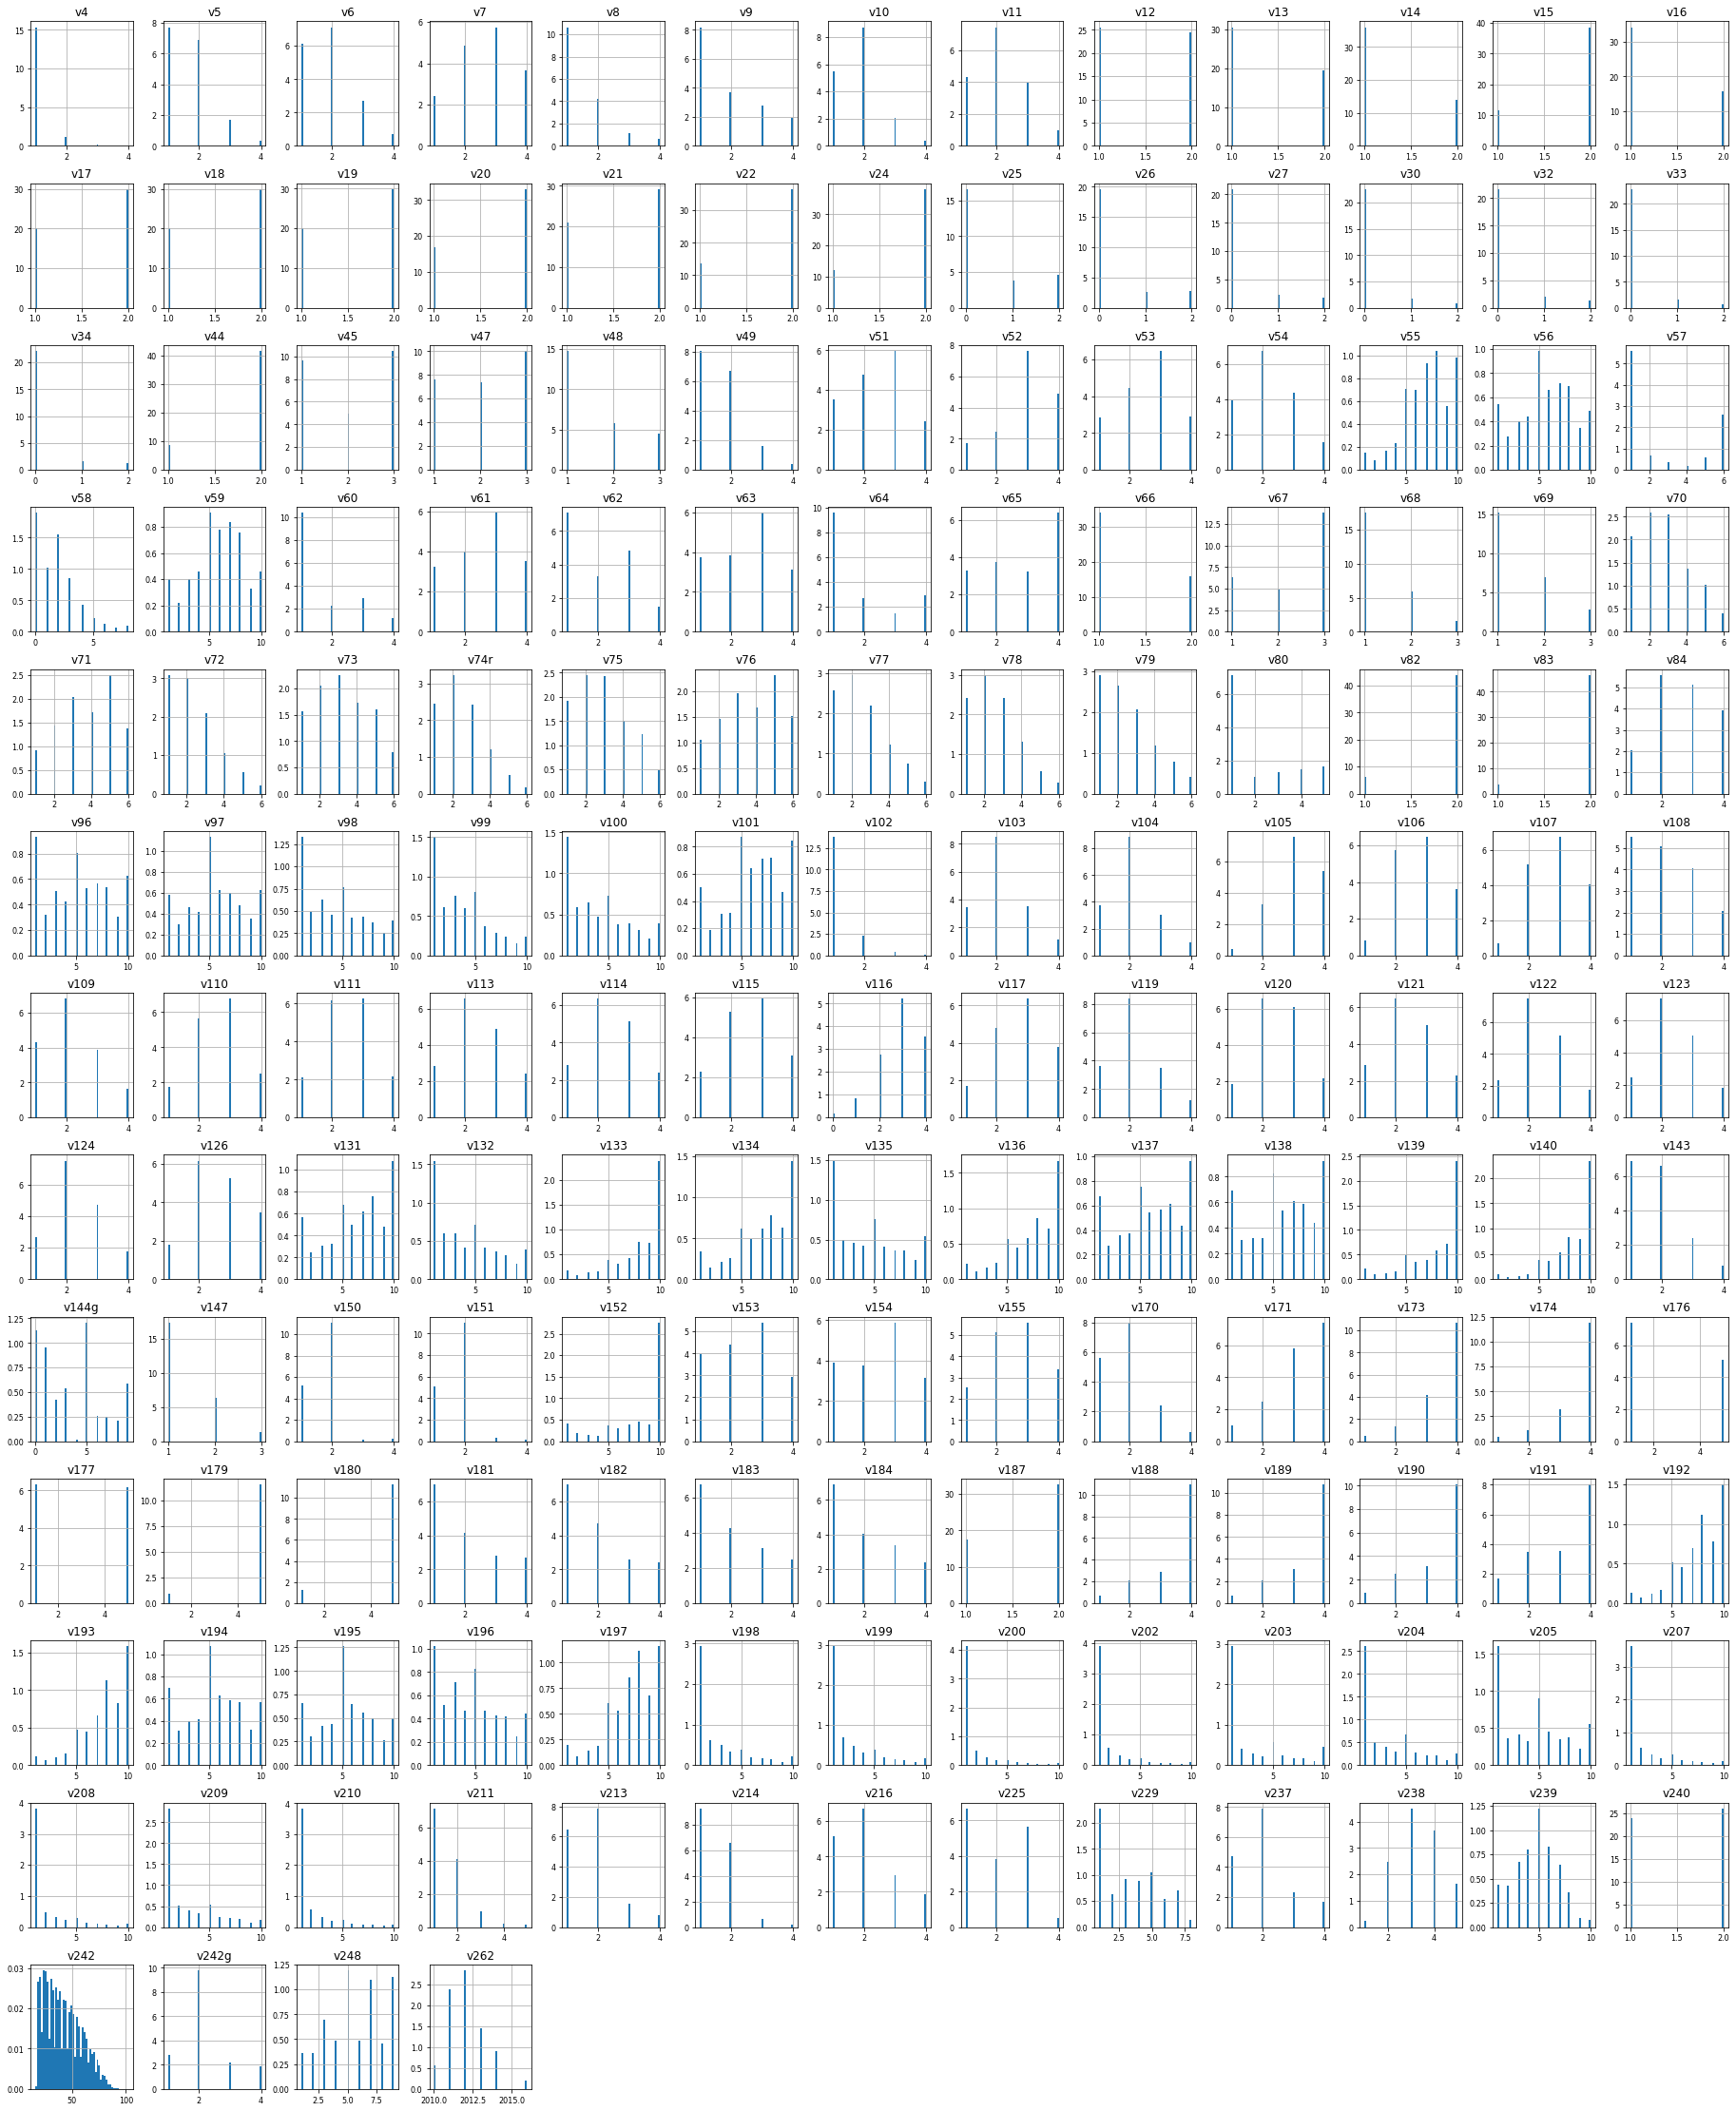

In [19]:
# quickly visualize distributions of all variables
key_wvs_var.hist(figsize=(32, 40), bins=50, density = 1, xlabelsize = 8, ylabelsize = 8);

At a glance, some of these variables are highly skewed and may need to be transformed for regression analyses.
  
- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
- If the skewness is between -1 and -0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed
  
https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de

In [20]:
# calculate the skewness of all columns in the dataframe and save as new dataframe

skewness = key_wvs_var.skew(axis = 0).to_frame().reset_index()

#rename columns
skewness.columns=['variable','skewness_val']
skewness

,variable,skewness_val
0,v4,4.361455
1,v5,0.875529
2,v6,0.674851
3,v7,-0.150758
4,v8,1.581732
5,v9,0.769572
6,v10,0.609989
7,v11,0.387079
8,v12,0.045353
9,v13,0.456218


In [21]:
#identify variables with skewness greater than 1.5 and save them to a list
high_skew = skewness[abs(skewness['skewness_val']) > 1.5].variable.tolist()
high_skew

['v4',
 'v8',
 'v26',
 'v27',
 'v30',
 'v32',
 'v33',
 'v34',
 'v44',
 'v82',
 'v83',
 'v102',
 'v173',
 'v174',
 'v179',
 'v180',
 'v199',
 'v200',
 'v202',
 'v207',
 'v208',
 'v210',
 'v211']

### Observations:  
  
Variables in the high_skew list may require a log (or other) transformation when performing logistic regression analyses.

### Next:  
  
Check out correlations
    - all predictors with the target variable `v10`
    - all predictors with one another

In [22]:
# any strong correlations?
strong_corr = key_wvs_var.corr()['v10']
strong_corr_list = strong_corr[abs(strong_corr) > 0.4].sort_values()
strong_corr_list

# no medium strength (or higher) correlations with target variable so far...

v10    1.0
Name: v10, dtype: float64

In [23]:
# any moderate correlations?
mod_corr = key_wvs_var.corr()['v10']
mod_corr_list = mod_corr[abs(strong_corr) > 0.19].sort_values(ascending = False)
mod_corr_list

v10     1.000000
v11     0.378108
v239   -0.198358
v55    -0.229554
v59    -0.296775
Name: v10, dtype: float64

In [24]:
mod_corr_r_squared = mod_corr_list ** 2
mod_corr_r_squared

v10     1.000000
v11     0.142965
v239    0.039346
v55     0.052695
v59     0.088076
Name: v10, dtype: float64

Here we see a few moderate correlations that seem valid on their face:  
- v11 = state of health
    - 1 (very good); 2 (good); 3 (fair); 4 (poor)
    - interpretation: **as respondents' health worsens, their happiness ratings worsen** (they go in the same direction since both items are reverse-coded)
    - this isn't surprising, and potentially accounts for 14% of the variance explained in happiness ratings when we use r-squared as an indicator
- v55 = how much freedom of choice and control over own life
    - ranges from 1 (no choice at all) to 10 (a great deal of choice)
    - interpretation: **as percieved freedom of choice and control increase**, happiness ratings go from 4 (not happy at all) to 1 (very happy) - so **happiness increases**
    - this isn't surprising either, and potentially accounts for 5% of the variance explained in happiness ratings when we use r-squared as an indicator
- v59 = satisfaction with financial situation of household
    - ranges from 1 (completely dissatisfied) to 10 (completely satisfied)
    - interpretation: **as satisfaction with one's household financial situation increases**, happiness ratings go from 4 (not happy at all) to 1 (very happy) - so **happiness increases**
    - no surprises here; this potentially accounts for 8% - 9% of the variance explained in happiness ratings when we use r-squared as an indicator
- v239 = scale of incomes
    - ranges from 1 (lowest income group) to 10 (highest income group)
    - interpretation: **as people percieve themselves to be at higher income levels**, happiness ratings go from 4 (not happy at all) to 1 (very happy) - so **happiness increases**
    - this is as expected, and potentially accounts for just under 4% of the variance explained in happiness ratings when we use r-squared as an indicator
  
The only potentially interesting thing here is that these correlations aren't stronger. This appropriately means that while these factors are somewhat important, maybe a combination of factors (or other factors missing from this data set) matter more. We'll see.

In [25]:
# are these correlations statistically significant?
from scipy import stats

In [26]:
health_corr = stats.pearsonr(key_wvs_var['v11'], key_wvs_var['v10'])
health_corr

(0.37810775812468067, 0.0)

In [27]:
choice_corr = stats.pearsonr(key_wvs_var['v55'], key_wvs_var['v10'])
choice_corr

(-0.22955438867311737, 0.0)

In [28]:
hhfinances_corr = stats.pearsonr(key_wvs_var['v59'], key_wvs_var['v10'])
hhfinances_corr

(-0.29677531170325966, 0.0)

In [29]:
income_lvl_corr = stats.pearsonr(key_wvs_var['v239'], key_wvs_var['v10'])
income_lvl_corr

(-0.19835763292652586, 0.0)

p-values of 0.0 across the board indicate that the strengths and directions of these variables' relationships with our target are probably not due to chance. I'm curious as to how these four features (health, choice, household finances, and income level) show up in later analyses.
  
### For the most part, are relationships linear?

In [30]:
# visualize the extent to which relationships with the target variable are linear

# sns.set(style = 'ticks', color_codes = True)
# sns.pairplot(key_wvs_var)

### Hierarchical Clustering EDA:  
  
How do countries hang together (or not) for groups of certain survey items?

In [31]:
schwartz_var = key_wvs_var[['country', 'v70', 'v71', 'v72', 'v73', 'v74r', 'v75', 'v76', 'v77', 'v78', 'v79']]
schwartz_var.head()

,country,v70,v71,v72,v73,v74r,v75,v76,v77,v78,v79
0,ALG,1,1,1,1,1,2,1,2,3,3
1,ALG,2,3,2,1,1,3,2,2,2,2
2,ALG,1,2,1,1,4,1,2,2,2,2
3,ALG,1,2,3,2,3,1,1,2,2,3
4,ALG,2,5,1,2,3,4,3,2,2,3


In [32]:
schwartz_var = schwartz_var.groupby('country').mean().round(2)
schwartz_var = schwartz_var.reset_index()
schwartz_var

,country,v70,v71,v72,v73,v74r,v75,v76,v77,v78,v79
0,ALG,2.67,3.09,1.82,2.28,2.46,2.29,3.41,2.63,2.58,1.95
1,ARM,3.00,4.26,2.09,4.46,2.24,3.02,3.96,2.30,2.70,2.10
2,AUL,2.97,4.68,2.63,3.90,2.72,3.77,4.14,2.74,2.60,3.34
3,AZE,3.19,3.63,2.69,3.22,2.88,3.29,3.93,2.46,2.84,1.83
4,BLR,3.29,3.71,2.82,3.71,2.96,3.41,4.05,2.83,2.98,2.56
5,BRA,2.60,4.88,1.94,2.63,1.97,3.12,4.28,2.35,2.10,2.48
6,CHL,2.45,3.90,1.93,2.28,2.10,3.08,3.63,2.70,2.52,2.52
7,CHN,3.35,3.40,2.65,3.88,2.66,3.12,4.21,3.13,2.84,2.90
8,COL,2.42,4.40,1.83,2.61,1.86,2.56,3.86,2.25,1.74,2.04
9,CYP,2.13,4.18,2.05,3.59,1.89,2.47,3.53,2.17,2.18,2.20


In [33]:
country_labels = wvs_w6[['v2', 'country']]
country_labels = country_labels.groupby('country').count()
country_labels = country_labels.reset_index()
country_labels = country_labels['country'].tolist()
country_labels

['ALG',
 'ARM',
 'AUL',
 'AZE',
 'BLR',
 'BRA',
 'CHL',
 'CHN',
 'COL',
 'CYP',
 'ECU',
 'EST',
 'GHA',
 'GMY',
 'GRG',
 'HAI',
 'HKG',
 'IND',
 'IRQ',
 'JOR',
 'JPN',
 'KYR',
 'KZK',
 'LEB',
 'LIB',
 'MAL',
 'MEX',
 'MOR',
 'NIG',
 'NTH',
 'PAK',
 'PER',
 'PHI',
 'POL',
 'PSE',
 'QAT',
 'ROK',
 'ROM',
 'RUS',
 'RWA',
 'SAF',
 'SIN',
 'SLV',
 'SPN',
 'SWD',
 'TAW',
 'THI',
 'TRI',
 'TUN',
 'TUR',
 'UKR',
 'URU',
 'USA',
 'UZB',
 'YEM',
 'ZIM']

In [34]:
# # hierarchical clustering to explore how countries' average responses compare on schwarts values items
# from scipy.cluster.hierarchy import linkage, dendrogram
# #from sklearn.preprocessing import normalize

# mergings = linkage(schwartz_var, method = 'complete')
# dendrogram(mergings,
#            labels = country_labels,
#            leaf_rotation = 90,
#            leaf_font_size = 6,
#           )
# plt.show()

In [148]:
# export to csv for modeling in a separate notebook
wvs_w6.to_csv('../data/Evaluating_Happiness/w6_modeling.csv', index=False)